# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Steven Liu
- GitHub Username: SdevinL

# Research Question

Why don't people visit the park more?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

- Dataset Name: Parks Survey 2015
- Link to the dataset: https://data.lacounty.gov/Recreation/Parks-Survey-2015/i4ww-mbp3
- Number of observations: 2208

This is a collection of data from a online survey form. The data has park name and which region they belong to. Also, the data contains letter grades that grade the park on cleanliness, safety, activity, courtesy, and visit again. The grading scale for the survey is "A" being the best to "F" being the worst.



# Setup

In [102]:
import pandas as pd
import numpy as np

# Dataset from: https://data.lacounty.gov/Recreation/Parks-Survey-2015/i4ww-mbp3
data = pd.read_csv('Parks_Survey_2015.csv')

# Let's see what the data looks like
data.head()

,PARK AGENCY,PARK NAME,CLEANLINESS,SAFETY,ACTIVITY,COURTESY,VISIT AGAIN,SURVEY_DATE
0,REGIONAL,Kenneth Hahn State Recreation Area,B,A,NaN,A,A,01/01/2015
1,REGIONAL,Devil's Punchbowl Natural Area and Nature Center,C,B,NaN,A,A,01/01/2015
2,REGIONAL,Devil's Punchbowl Natural Area and Nature Center,A,B,NaN,B,A,01/03/2015
3,EAST,Avenue Park,A,C,A,A,A,01/03/2015
4,EAST,Dalton Park,A,A,NaN,A,A,01/03/2015


# Data Cleaning

Describe your data cleaning steps here.

In [103]:
data.shape

(2208, 8)

We have 2208 rows, and 8 columns. We will only care about the features cleanliness, safety, activity, courtesy, and visit again because they are the features that we can use to perform tasks.

In [104]:
# Checking for NaN values to see if it is worth dropping

data.isna().sum()

PARK AGENCY      0
PARK NAME        0
CLEANLINESS     12
SAFETY          18
ACTIVITY       585
COURTESY        75
VISIT AGAIN     60
SURVEY_DATE      0
dtype: int64

If we drop the rows with missing values, we will have to drop at least 585 rows. That is about a quarter of the data, so I will fill in these missing values.

In [105]:
# Let's see what possible values are in the features we care about
for col in data.iloc[:,2:7]:
    print(col, ': ', data[col].unique())

CLEANLINESS :  ['B' 'C' 'A' 'F' 'D' nan]
SAFETY :  ['A' 'B' 'C' 'F' 'D' nan]
ACTIVITY :  [nan 'A' 'C' 'F' 'B' 'D']
COURTESY :  ['A' 'B' 'F' nan 'C' 'D']
VISIT AGAIN :  ['A' 'F' 'B' 'C' 'D' nan]


We currently see string values, which will need to be converted into numeric values. Knowing the dataset, we know that A is the most positive response toward the features, and F is the worst.

In [106]:
# Values range from A, B, C, D, F and can be converted to numerical values 1-5
data = data.replace(['A', 'B', 'C', 'D', 'F'], [1, 2, 3, 4, 5])

# Let's see what data looks now:
data.head()

,PARK AGENCY,PARK NAME,CLEANLINESS,SAFETY,ACTIVITY,COURTESY,VISIT AGAIN,SURVEY_DATE
0,REGIONAL,Kenneth Hahn State Recreation Area,2.0,1.0,NaN,1.0,1.0,01/01/2015
1,REGIONAL,Devil's Punchbowl Natural Area and Nature Center,3.0,2.0,NaN,1.0,1.0,01/01/2015
2,REGIONAL,Devil's Punchbowl Natural Area and Nature Center,1.0,2.0,NaN,2.0,1.0,01/03/2015
3,EAST,Avenue Park,1.0,3.0,1.0,1.0,1.0,01/03/2015
4,EAST,Dalton Park,1.0,1.0,NaN,1.0,1.0,01/03/2015


The ordinal variables have been converted into numeric variables. Now, we can use the mean of these features in order to fill for the NaN values.

In [ ]:
# We will fill missing values with the mean of the column 
data = data.replace(np.nan, data.mean())

data.head()

# EDA

No more strings and NaN values in our features! We can now perform some EDA to get a sense of what our data looks like.

In [109]:
data.describe()

,CLEANLINESS,SAFETY,ACTIVITY,COURTESY,VISIT AGAIN
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1.366120,1.336073,1.290203,1.289733,1.269088
std,0.872382,0.852154,0.739927,0.847969,0.837625
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.290203,1.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


We can see that the average value in each of the features is close to 1, so most responses to the surveys seems to be positive. We can assume this because there are no outliers in the values that would make the mean unreliable.

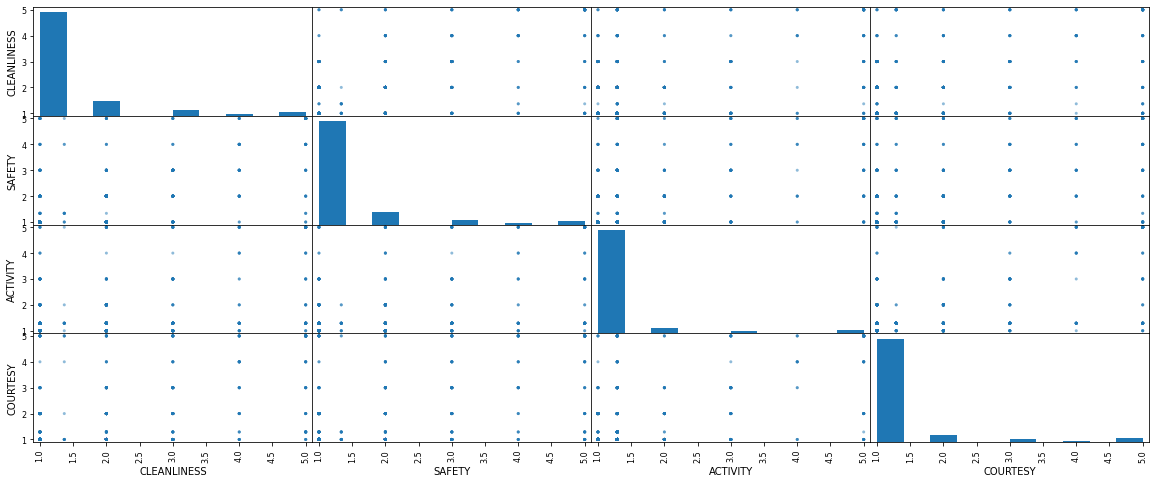

In [81]:
# Let's see the relationship between features and the distribution of each feature.

import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(data.iloc[:,2:6], figsize=(20,8))
plt.show()

Here we can see the distribution of each feature which show what we would expect, majority of the people had a good experience in the park. What's interesting is that we don't see much correlation between the features. 

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*